In [109]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.mlab as mlab
np.random.seed(2)


Tạo dữ liệu và tìm nghiệm theo công thứ Linear regression

In [110]:
X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1)

# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_exact = np.dot(np.linalg.pinv(A), b)

In [111]:

def cost(w):
	return .5/Xbar.shape[0]*np.linalg.norm(y - Xbar.dot(w), 2)**2;

def grad(w):
	return 1/Xbar.shape[0] * Xbar.T.dot(Xbar.dot(w) - y)


In [112]:

def numerical_grad(w, cost):
	eps = 1e-4
	g = np.zeros_like(w)
	for i in range(len(w)):
		w_p = w.copy()
		w_n = w.copy()
		w_p[i] += eps 
		w_n[i] -= eps
		g[i] = (cost(w_p) - cost(w_n))/(2*eps)
	return g 

def check_grad(w, cost, grad):
	w = np.random.rand(w.shape[0], w.shape[1])
	grad1 = grad(w)
	grad2 = numerical_grad(w, cost)
	return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 


print( 'Checking gradient...', check_grad(np.random.rand(2, 1), cost, grad))
print(grad(np.random.rand(2, 1)))
print(numerical_grad(np.random.rand(2, 1), cost))

Checking gradient... True
[[-5.11424113]
 [-2.71307444]]
[[-4.33336451]
 [-2.27599051]]


In [113]:
def myGD(w_init, grad, eta):
	w = [w_init]
	for it in range(100):
		w_new = w[-1] - eta*grad(w[-1])
		if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
			break 
		w.append(w_new)
		# print('iter %d: ' % it, w[-1].T)
	return (w, it) 

w_init = np.array([[2], [1]])
(w1, it1) = myGD(w_init, grad, 0.1)
(w2, it2) = myGD(w_init, grad, 1)
(w3, it3) = myGD(w_init, grad, 2)

print(it1, it2, it3)

99 49 99


Visulization

In [114]:
N = X.shape[0]
a1 = np.linalg.norm(y, 2)**2/N
b1 = 2*np.sum(X)/N
c1 = np.linalg.norm(X, 2)**2/N
d1 = -2*np.sum(y)/N 
e1 = -2*X.T.dot(y)/N

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
xg = np.arange(1.5, 6.0, delta)
yg = np.arange(0.5, 4.5, delta)
Xg, Yg = np.meshgrid(xg, yg)
Z = a1 + Xg**2 +b1*Xg*Yg + c1*Yg**2 + d1*Xg + e1*Yg


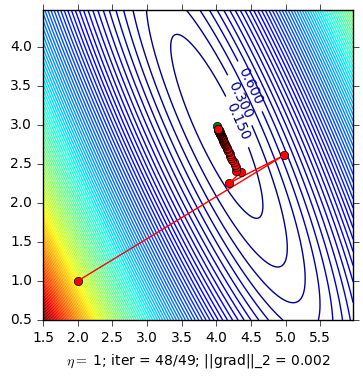

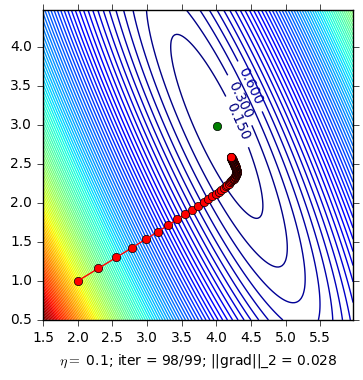

In [117]:
def save_gif2(eta):
    (w, it) = myGD(w_init, grad, eta)
    fig, ax = plt.subplots(figsize=(4,4))    
    plt.cla()
    plt.axis([1.5, 6, 0.5, 4.5])
#     x0 = np.linspace(0, 1, 2, endpoint=True)
    
    def update(ii):
        if ii == 0:
            plt.cla()
            CS = plt.contour(Xg, Yg, Z, 100)
            manual_locations = [(4.5, 3.5), (4.2, 3), (4.3, 3.3)]
            animlist = plt.clabel(CS, inline=.1, fontsize=10, manual=manual_locations)
#             animlist = plt.title('labels at selected locations')
            plt.plot(w_exact[0], w_exact[1], 'go')
        else:
            animlist = plt.plot([w[ii-1][0], w[ii][0]], [w[ii-1][1], w[ii][1]], 'r-')
        animlist = plt.plot(w[ii][0], w[ii][1], 'ro') 
        xlabel = '$\eta =$ ' + str(eta) + '; iter = %d/%d' %(ii, it)
        xlabel += '; ||grad||_2 = %.3f' % np.linalg.norm(grad(w[ii]))
        ax.set_xlabel(xlabel)
        return animlist, ax
       
    anim1 = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    fn = 'img2_' + str(eta) + '.gif'
    anim1.save(fn, dpi=100, writer='imagemagick')

save_gif2(1)
save_gif2(.1)
# save_gif2(2)

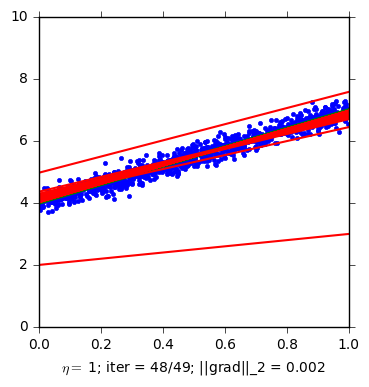

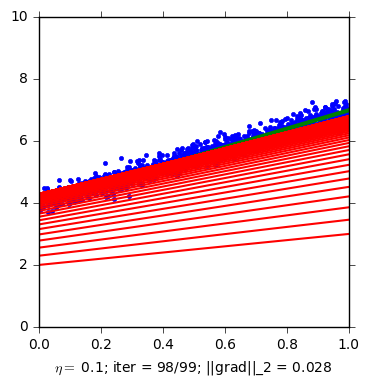

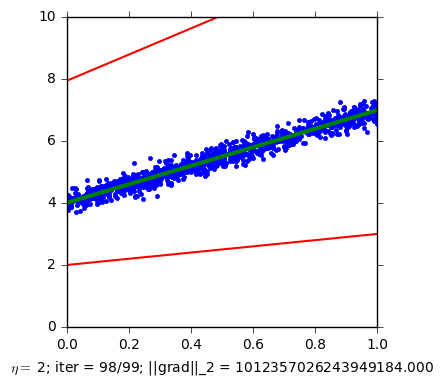

In [118]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 

def save_gif1(eta):
    (w, it) = myGD(w_init, grad, eta)
    fig, ax = plt.subplots(figsize=(4, 4))    
    plt.cla()
    x0 = np.linspace(0, 1, 2, endpoint=True)
    
    def update(ii):
        if ii == 0:
            plt.cla()
            plt.plot(X, y, 'b.')
            plt.axis([0, 1, 0, 10])
            y0 = w_exact[0][0] + w_exact[1][0]*x0
            plt.plot(x0, y0, color = 'green', linewidth = 3)

        y0 = w[ii][0] + w[ii][1]*x0
        animlist = plt.plot(x0, y0, 'r', linewidth = 1.5) 
        
        xlabel = '$\eta =$ ' + str(eta) + '; iter = %d/%d' %(ii, it)
        xlabel += '; ||grad||_2 = %.3f' % np.linalg.norm(grad(w[ii]))
        ax.set_xlabel(xlabel)
        return animlist, ax
    anim1 = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    fn = 'img1_' + str(eta) + '.gif'
    anim1.save(fn, dpi=100, writer='imagemagick')
    
save_gif1(1)
save_gif1(.1)
save_gif1(2)